<a href="https://colab.research.google.com/github/maruwrks/Deep-Learning-Task/blob/main/neural_nets_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Image Classifier Using the Keras Sequential API


### Importing TensorFlow and other libraries

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Loading the Fashion MNIST dataset

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

### Data Preprocessing (Scaling)

In [14]:
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

### Splitting data into training, validation, and test sets

In [15]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

### Class names for Fashion MNIST

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Building the Sequential Model

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model summary

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

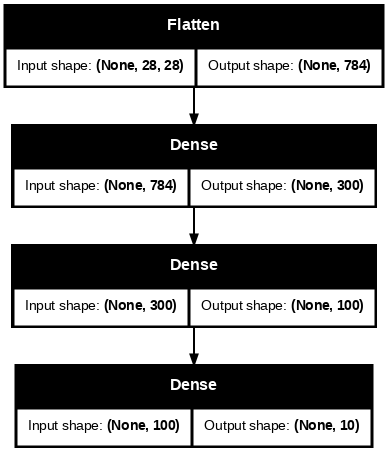

In [19]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True, dpi=72)

In [20]:
# Accessing layers, weights, and biases
hidden1 = model.layers[1]
hidden1.name
model.get_layer(hidden1.name)
weights, biases = hidden1.get_weights()

### Compiling the Model

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training

In [22]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6748 - loss: 1.0455 - val_accuracy: 0.8254 - val_loss: 0.5173
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8247 - loss: 0.5070 - val_accuracy: 0.8360 - val_loss: 0.4738
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8456 - loss: 0.4426 - val_accuracy: 0.8492 - val_loss: 0.4339
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8542 - loss: 0.4138 - val_accuracy: 0.8582 - val_loss: 0.4170
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8608 - loss: 0.3969 - val_accuracy: 0.8688 - val_loss: 0.3784
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8658 - loss: 0.3816 - val_accuracy: 0.8714 - val_loss: 0.3779
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8694 - loss: 0.3693 - val_accuracy: 0.8770 - val_loss: 0.3585
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8732 - loss: 0.3556

### Plotting Learning Curves

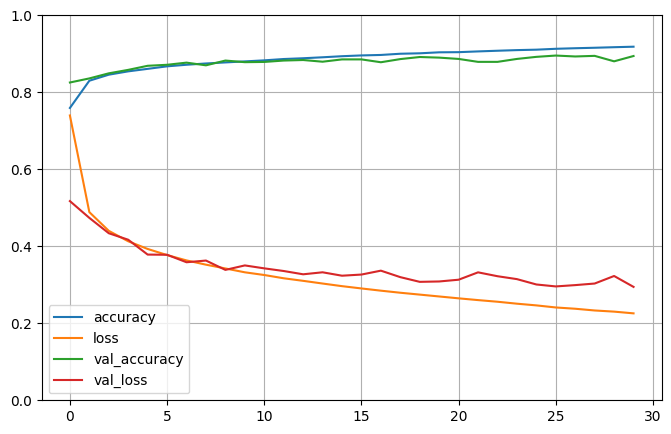

In [23]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Evaluate

In [24]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8855 - loss: 0.3248


[0.3269755244255066, 0.8845999836921692]

### Making Predictions

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
y_pred = np.argmax(y_proba, axis=1) # Alternative to model.predict_classes()
y_pred

array([9, 2, 1])

In [27]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [28]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

##Complex Models Using the Keras Functional API or the Subclassing API

### Functional API

In [29]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
flatten = keras.layers.Flatten()(concat) # Add a Flatten layer
output = keras.layers.Dense(10, activation="softmax")(flatten) # Connect to the flattened output
model_functional = keras.models.Model(inputs=[input_], outputs=[output])

In [30]:
model_functional.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 28, 300)   │      8,700 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 28, 100)   │     30,100 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 128)   │          0 │ input_layer_1[0]… │
│ (Concatenate)       │                   │            │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 3584)      │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 10)        │     35,850 │ flatten_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 74,650 (291.60 KB)

 Trainable params: 74,650 (291.60 KB)

 Non-trainable params: 0 (0.00 B)

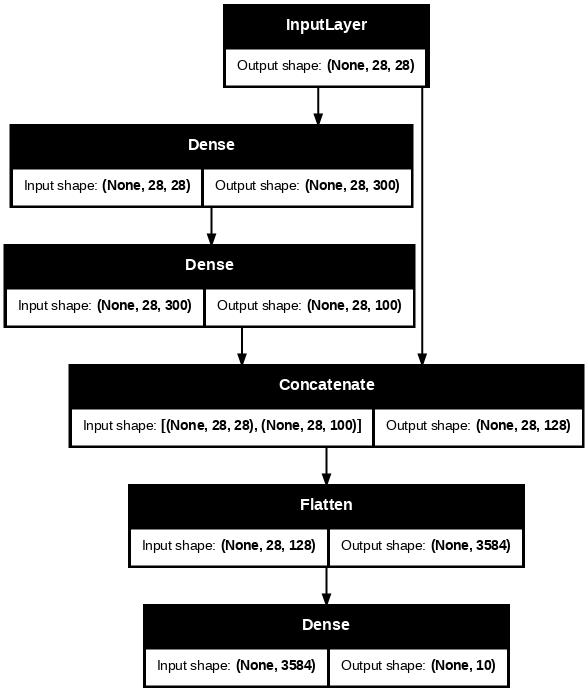

In [31]:
keras.utils.plot_model(model_functional, "my_complex_model.png", show_shapes=True, dpi=72)

In [32]:
model_functional.compile(loss="sparse_categorical_crossentropy",
                         optimizer="sgd",
                         metrics=["accuracy"])

In [33]:
history_functional = model_functional.fit(X_train, y_train, epochs=20,
                                          validation_data=(X_valid, y_valid))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_5']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


1718/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6874 - loss: 1.0027

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_5']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.6875 - loss: 1.0024 - val_accuracy: 0.8246 - val_loss: 0.5327
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8131 - loss: 0.5354 - val_accuracy: 0.8372 - val_loss: 0.4740
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8290 - loss: 0.4833 - val_accuracy: 0.8536 - val_loss: 0.4460
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8427 - loss: 0.4505 - val_accuracy: 0.8554 - val_loss: 0.4243
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8504 - loss: 0.4360 - val_accuracy: 0.8580 - val_loss: 0.4102
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8551 - loss: 0.4148 - val_accuracy: 0.8630 - val_loss: 0.3993
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8640 - loss: 0.3994 - val_accuracy: 0.8644 - val_loss: 0.3981
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - accuracy: 0.8636 - loss: 0.39

### Model with multiple inputs

In [34]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model_multi_input = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [35]:
model_multi_input.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

### Model with multiple outputs

In [36]:
input_A = keras.layers.Input(shape=[6], name="input_A")
input_B = keras.layers.Input(shape=[8], name="input_B")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])

output_main = keras.layers.Dense(1, name="main_output")(concat)
output_aux = keras.layers.Dense(1, name="aux_output")(hidden2)

model_multi_output = keras.models.Model(inputs=[input_A, input_B],
                                         outputs=[output_main, output_aux])

In [37]:
model_multi_output.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

### Subclassing API

In [38]:
class MySequentialModel(keras.models.Sequential):
    def call(self, inputs):
        return super().call(inputs)

class MyModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.dense1 = keras.layers.Dense(units, activation=activation)
        self.dense2 = keras.layers.Dense(units, activation=activation)
        self.dense3 = keras.layers.Dense(10, activation="softmax")

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)

##Saving and Restoring Models

In [39]:
model.save("my_keras_model.h5")

In [40]:
model_loaded = keras.models.load_model("my_keras_model.h5")

##Using Callbacks During Training

### Model Checkpointing and Early Stopping

In [41]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history_callbacks = model.fit(X_train, y_train, epochs=100,
                              validation_data=(X_valid, y_valid),
                              callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1715/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9194 - loss: 0.2246

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9194 - loss: 0.2246 - val_accuracy: 0.8900 - val_loss: 0.2939
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9195 - loss: 0.2214 - val_accuracy: 0.8962 - val_loss: 0.2949
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9240 - loss: 0.2136 - val_accuracy: 0.8902 - val_loss: 0.3040
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9259 - loss: 0.2061 - val_accuracy: 0.8890 - val_loss: 0.3071
Epoch 5/100
1715/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9238 - loss: 0.2084

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9238 - loss: 0.2084 - val_accuracy: 0.8984 - val_loss: 0.2927
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9296 - loss: 0.1977 - val_accuracy: 0.8918 - val_loss: 0.3010
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9307 - loss: 0.1976 - val_accuracy: 0.8958 - val_loss: 0.2954
Epoch 8/100
1711/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9295 - loss: 0.1963

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9294 - loss: 0.1963 - val_accuracy: 0.8970 - val_loss: 0.2920
Epoch 9/100
1707/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9299 - loss: 0.1909

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9299 - loss: 0.1909 - val_accuracy: 0.8976 - val_loss: 0.2903
Epoch 10/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9314 - loss: 0.1888 - val_accuracy: 0.8958 - val_loss: 0.2943
Epoch 11/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9319 - loss: 0.1888 - val_accuracy: 0.8902 - val_loss: 0.3079
Epoch 12/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9343 - loss: 0.1856 - val_accuracy: 0.8930 - val_loss: 0.3169
Epoch 13/100
1706/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9326 - loss: 0.1848

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9326 - loss: 0.1848 - val_accuracy: 0.8984 - val_loss: 0.2839
Epoch 14/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9357 - loss: 0.1778 - val_accuracy: 0.8932 - val_loss: 0.2988
Epoch 15/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9361 - loss: 0.1769 - val_accuracy: 0.8912 - val_loss: 0.3134
Epoch 16/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9388 - loss: 0.1719 - val_accuracy: 0.8876 - val_loss: 0.3112
Epoch 17/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9407 - loss: 0.1665 - val_accuracy: 0.8944 - val_loss: 0.3126
Epoch 18/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9405 - loss: 0.1688 - val_accuracy: 0.9018 - val_loss: 0.2875
Epoch 19/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9419 - loss: 0.1621 - val_accuracy: 0.9018 - val_loss: 0.2848
Epoch 20/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9411 - loss: 0.164

##TensorBoard

In [42]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [43]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history_tensorboard = model.fit(X_train, y_train, epochs=30,
                                validation_data=(X_valid, y_valid),
                                callbacks=[tensorboard_cb])

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9356 - loss: 0.1795 - val_accuracy: 0.8976 - val_loss: 0.2904
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9379 - loss: 0.1764 - val_accuracy: 0.8938 - val_loss: 0.2968
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9396 - loss: 0.1706 - val_accuracy: 0.9024 - val_loss: 0.2825
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9402 - loss: 0.1693 - val_accuracy: 0.9028 - val_loss: 0.2886
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9406 - loss: 0.1670 - val_accuracy: 0.9028 - val_loss: 0.2866
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9398 - loss: 0.1671 - val_accuracy: 0.8936 - val_loss: 0.2944
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9411 - loss: 0.1647 - val_accuracy: 0.8980 - val_loss: 0.3038
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9415 - loss: 0.1610 -

##Fine-Tuning Neural Network Hyperparameters

### Using GridSearchCV with Keras models

In [44]:
# Build a Keras model inside a function
from scikeras.wrappers import KerasClassifier

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))

    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

keras_clf = KerasClassifier(model=build_model,verbose=1)

In [45]:
from sklearn.model_selection import GridSearchCV

param_distribs = {
    "model__n_hidden": [1, 2, 3],
    "model__n_neurons": [50, 100, 150],
    "model__learning_rate": [3e-3, 3e-2]
}

grid_search_cv = GridSearchCV(keras_clf, param_distribs,
                              cv=3, verbose=2, n_jobs=-1)
grid_search_cv.fit(X_train, y_train,
                   epochs=10,
                   validation_data=(X_valid, y_valid),
                   callbacks=[early_stopping_cb])

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6952 - loss: 0.8708 - val_accuracy: 0.8312 - val_loss: 0.4718
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8395 - loss: 0.4394 - val_accuracy: 0.8594 - val_loss: 0.3983
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8602 - loss: 0.3821 - val_accuracy: 0.8698 - val_loss: 0.3638
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8678 - loss: 0.3533 - val_accuracy: 0.8754 - val_loss: 0.3531
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8789 - loss: 0.3303 - val_accuracy: 0.8712 - val_loss: 0.3344
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8837 - loss: 0.3110 - val_accuracy: 0.8864 - val_loss: 0.3103
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8879 - loss: 0.3015 - val_accuracy: 0.8856 - val_loss: 0.3195
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8933 - loss: 0.2882 -

,estimator,KerasClassifi..._weight=None )
,param_grid,"{'model__learning_rate': [0.003, 0.03], 'model__n_hidden': [1, 2, ...], 'model__n_neurons': [50, 100, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,model,<function bui...x7ee2e4fa7f60>


In [46]:
grid_search_cv.best_params_

{'model__learning_rate': 0.03, 'model__n_hidden': 3, 'model__n_neurons': 150}

In [47]:
grid_search_cv.best_score_

np.float64(0.8792364528110971)

In [49]:
best_model = grid_search_cv.best_estimator_.model_
best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8689 - loss: 0.3595


[0.36331427097320557, 0.8686000108718872]